# Lithium Blood-Brain-Barrier Penetration Classification

### Imports

In [22]:
from smdt import datasets
from smdt import molecular_descriptors
from smdt import classification

### Data

#### Data Loading

In [23]:
LiBloodBarrier = datasets.load_LiBloodBarrier()

Reference: 
Hu Li, Chun Wei Yap, Choong Yong Ung, Ying Xue, Zhi Wei Cao and Yu Zong Chen, J. Chem. Inf. Model. 2005


#### Descriptor Calculation

In [24]:
data = molecular_descriptors.getAllDescriptors(LiBloodBarrier)


Calculating Molecular Descriptors...
Row 387 out of 387
Calculating Molecular Descriptors Completed.


#### Data Cleaning

In [25]:
y = data['Target']
X = data.drop(['Target'], axis=1)

In [26]:
from sklearn.preprocessing import Imputer
a = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = a.fit_transform(X)

#### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Models

#### Gaussian Naive Bayes

In [28]:
model1, y_pred1, y_score1 = classification.fit_GaussianNB(X_train, X_test, y_train, y_test, 29)

Training data GridSearchCV accuracy: 0.79655
Testing Data Classification accuracy: 0.79381

Classification Report:
             precision    recall  f1-score   support

          n       0.75      0.56      0.64        32
          p       0.81      0.91      0.86        65

avg / total       0.79      0.79      0.79        97



#### K Nearest Neighbors

In [29]:
model2, y_pred2, y_score2 = classification.fit_KNearestNeighbors(X_train, X_test, y_train, y_test, 44)

Training data GridSearchCV accuracy: 0.81724
Testing Data Classification accuracy: 0.81443

Classification Report:
             precision    recall  f1-score   support

          n       0.79      0.59      0.68        32
          p       0.82      0.92      0.87        65

avg / total       0.81      0.81      0.81        97



#### Linear SVC

In [30]:
model3, y_pred3, y_score3 = classification.fit_LinearSVC(X_train, X_test, y_train, y_test, 25)

Training data GridSearchCV accuracy: 0.79310
Testing Data Classification accuracy: 0.75258

Classification Report:
             precision    recall  f1-score   support

          n       0.67      0.50      0.57        32
          p       0.78      0.88      0.83        65

avg / total       0.74      0.75      0.74        97



#### Random Forest Classifier

In [31]:
model4, y_pred4, y_score4 = classification.fit_RandomForestClassifier(X_train, X_test, y_train, y_test, 31)

Training data GridSearchCV accuracy: 0.83448
Testing Data Classification accuracy: 0.79381

Classification Report:
             precision    recall  f1-score   support

          n       0.73      0.59      0.66        32
          p       0.82      0.89      0.85        65

avg / total       0.79      0.79      0.79        97



#### SGD Classifier

In [32]:
model5, y_pred5, y_score5 = classification.fit_SGDClassifier(X_train, X_test, y_train, y_test, 31)

Training data GridSearchCV accuracy: 0.76552
Testing Data Classification accuracy: 0.79381

Classification Report:
             precision    recall  f1-score   support

          n       0.71      0.62      0.67        32
          p       0.83      0.88      0.85        65

avg / total       0.79      0.79      0.79        97



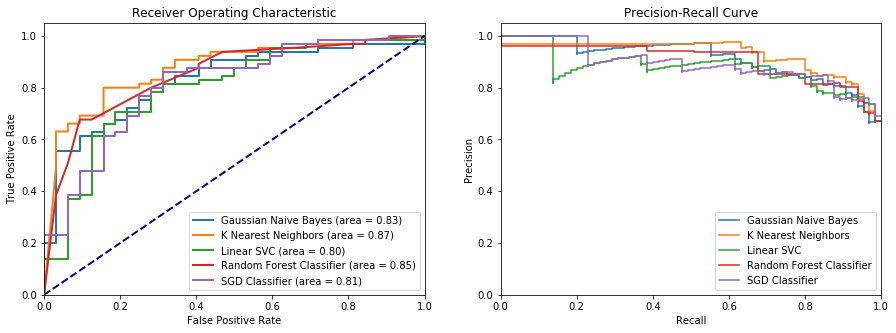

In [63]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test, y_score1[:, 1], pos_label='p')
fpr2, tpr2, _ = roc_curve(y_test, y_score2[:, 1], pos_label='p')
fpr3, tpr3, _ = roc_curve(y_test, y_score3, pos_label='p')
fpr4, tpr4, _ = roc_curve(y_test, y_score4[:, 1], pos_label='p')
fpr5, tpr5, _ = roc_curve(y_test, y_score5, pos_label='p')

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(15,5))
plt.subplot(121)
lw = 2
plt.plot(fpr1, tpr1,
         lw=lw, label='Gaussian Naive Bayes (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2,
         lw=lw, label='K Nearest Neighbors (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3,
         lw=lw, label='Linear SVC (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4,
         lw=lw, label='Random Forest Classifier (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5,
         lw=lw, label='SGD Classifier (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(122)
precision1, recall1, _ = precision_recall_curve(y_test, y_score1[:,1], pos_label='p')
precision2, recall2, _ = precision_recall_curve(y_test, y_score2[:,1], pos_label='p')
precision3, recall3, _ = precision_recall_curve(y_test, y_score3, pos_label='p')
precision4, recall4, _ = precision_recall_curve(y_test, y_score4[:,1], pos_label='p')
precision5, recall5, _ = precision_recall_curve(y_test, y_score5, pos_label='p')

plt.step(recall1, precision1, label='Gaussian Naive Bayes',
         where='post')
plt.step(recall2, precision2, label='K Nearest Neighbors',
         where='post')
plt.step(recall3, precision3, label='Linear SVC',
         where='post')
plt.step(recall4, precision4, label='Random Forest Classifier',
         where='post')
plt.step(recall5, precision5, label='SGD Classifier',
         where='post')

#plt.fill_between(recall, precision, step='post', alpha=0.2,
#                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.show()

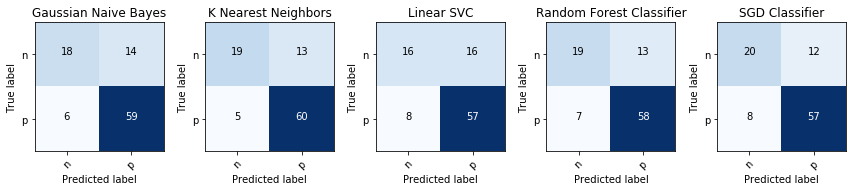

In [109]:
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_test, y_pred1)
cnf_matrix2 = confusion_matrix(y_test, y_pred2)
cnf_matrix3 = confusion_matrix(y_test, y_pred3)
cnf_matrix4 = confusion_matrix(y_test, y_pred4)
cnf_matrix5 = confusion_matrix(y_test, y_pred5)

np.set_printoptions(precision=2)

plt.figure(figsize=(12,10))
plt.subplot(151)
plot_confusion_matrix(cnf_matrix1, classes=y.unique(),
                      title='Gaussian Naive Bayes')
plt.subplot(152)
plot_confusion_matrix(cnf_matrix2, classes=y.unique(),
                      title='K Nearest Neighbors')
plt.subplot(153)
plot_confusion_matrix(cnf_matrix3, classes=y.unique(),
                      title='Linear SVC')
plt.subplot(154)
plot_confusion_matrix(cnf_matrix4, classes=y.unique(),
                      title='Random Forest Classifier')
plt.subplot(155)
plot_confusion_matrix(cnf_matrix5, classes=y.unique(),
                      title='SGD Classifier')

plt.show()